## IMPORTANT NOTE

This notebook provides qualitative examples of the trained 2Player reproducing some of the qualitative results presented in the paper. Before running this notebook, please download the pretrained models [here](https://huggingface.co/EPFL-ECEO/2Player_pretrained) and llace them under `checkpoints/2player` and `checkpoints/player2`.

In [5]:
import torch
from models.players import PlayersGame_W_Probability
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from PIL import Image
import numpy as np
import rasterio

## Example on HRSCD

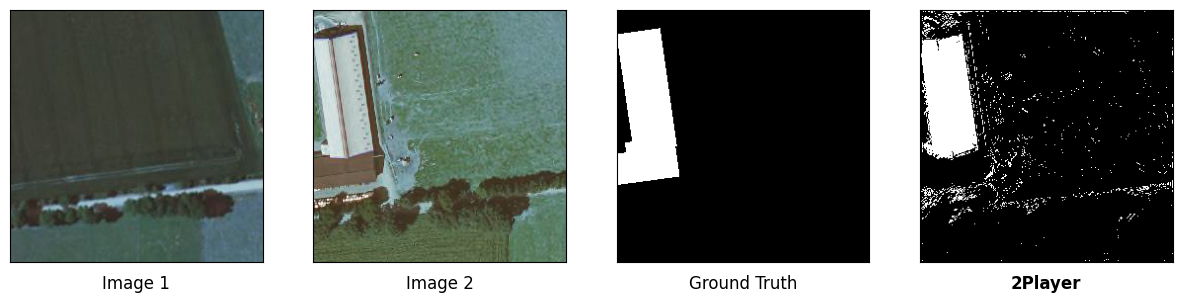

In [5]:
# Load images

im1 = Image.open('./test_imgs/HRSCD1.tif')
im2 = Image.open('./test_imgs/HRSCD2.tif')
lab = Image.open('./test_imgs/HRSCDLab.tif')
im1 = TF.to_tensor(im1)
im2 = TF.to_tensor(im2)
lab = TF.to_tensor(lab)

# Load pretrained model
pretrained_2players =  './checkpoints/2player/2Player_HRSCD.ckpt'
pretrained_AE = './checkpoints/player2/player2_pretrained_HRSCD.ckpt'
model_HRSCD =PlayersGame_W_Probability.load_from_checkpoint(pretrained_2players, lr=1e-4, P1='SiamUnet', lamb = 2e-2, lamb_totvar=0, lamb_prob=1e-4, alpha=10, beta=1e-2, pretrained_AE=pretrained_AE, freeze=False).eval()

pred_w_prob = model_HRSCD(im1.unsqueeze(0),im2.unsqueeze(0))

import matplotlib.pyplot as plt
import matplotlib

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15,4))

ax1.imshow(im1.permute(1, 2, 0))
ax2.imshow(im2.permute(1, 2, 0))
ax3.imshow(lab.squeeze(), cmap='gist_gray', vmin=0, vmax=1)
ax4.imshow((pred_w_prob>0.5).to(device='cpu').detach().squeeze(), cmap='gist_gray', vmin=0, vmax=1)

ax1.text(0.5, -0.05, 'Image 1', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax2.text(0.5, -0.05, 'Image 2', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax3.text(0.5, -0.05, 'Ground Truth', ha='center', va='top', transform=ax3.transAxes, fontsize=12)
ax4.text(0.5, -0.05, '2Player', ha='center', va='top', transform=ax4.transAxes, fontsize=12,fontweight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])

## Example on ValaisCD

/opt/anaconda3/envs/change/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.2.5, which is newer than your current Lightning version: v2.2.3


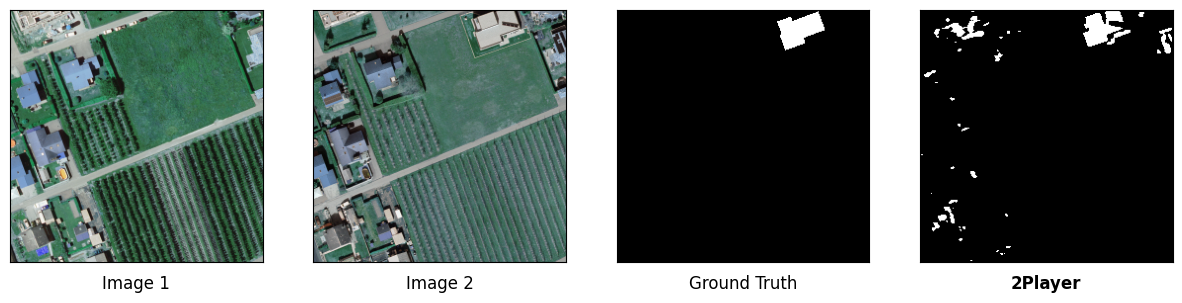

In [8]:
# Load images

im1 = Image.open('./test_imgs/Valais1.tif')
im2 = Image.open('./test_imgs/Valais2.tif')
lab = Image.open('./test_imgs/ValaisLab.tif')
im1 = TF.to_tensor(im1)
im2 = TF.to_tensor(im2)
lab = torch.tensor(np.array(lab), dtype=torch.float32)

# Load pretrained model
pretrained_2players =  './checkpoints/2player/2Player_ValaisCD.ckpt'
pretrained_AE = './checkpoints/player2/player2_pretrained_ValaisCD.ckpt'
model_HRSCD =PlayersGame_W_Probability.load_from_checkpoint(pretrained_2players, lr=1e-4, P1='SiamUnet', lamb = 2e-2, lamb_totvar=0, lamb_prob=1e-4, alpha=10, beta=1e-2, pretrained_AE=pretrained_AE, freeze=False).eval()

pred_w_prob = model_HRSCD(im1.unsqueeze(0),im2.unsqueeze(0))

import matplotlib.pyplot as plt
import matplotlib

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15,4))

ax1.imshow(im1.permute(1, 2, 0))
ax2.imshow(im2.permute(1, 2, 0))
ax3.imshow(lab.squeeze(), cmap='gist_gray', vmin=0, vmax=1)
ax4.imshow((pred_w_prob>0.5).to(device='cpu').detach().squeeze(), cmap='gist_gray', vmin=0, vmax=1)

ax1.text(0.5, -0.05, 'Image 1', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax2.text(0.5, -0.05, 'Image 2', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax3.text(0.5, -0.05, 'Ground Truth', ha='center', va='top', transform=ax3.transAxes, fontsize=12)
ax4.text(0.5, -0.05, '2Player', ha='center', va='top', transform=ax4.transAxes, fontsize=12,fontweight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])

## Example on LEVIR-CD

/opt/anaconda3/envs/change/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.2.5, which is newer than your current Lightning version: v2.2.3


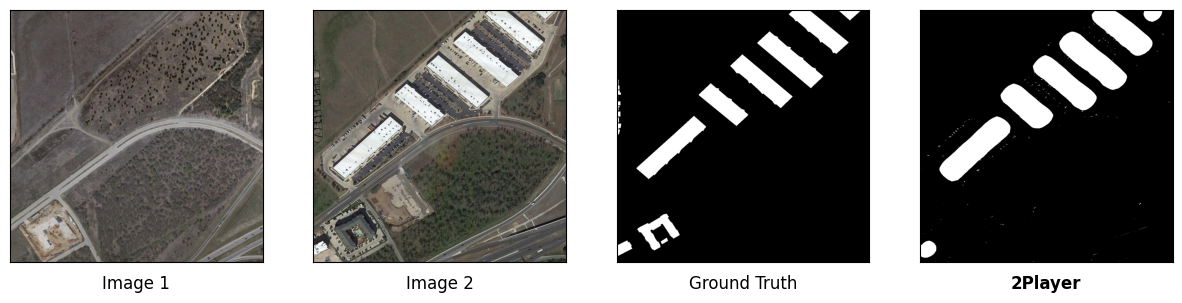

In [3]:
# Load images

im1 = Image.open('./test_imgs/LEVIR1.png')
im2 = Image.open('./test_imgs/LEVIR2.png')
lab = Image.open('./test_imgs/LEVIRLabel.png')
im1 = TF.to_tensor(im1)
im2 = TF.to_tensor(im2)
lab = TF.to_tensor(lab)

# Load pretrained model
pretrained_2players =  './checkpoints/2player/2Player_LEVIRCD.ckpt'
pretrained_AE = './checkpoints/player2/player2_pretrained_LEVIRCD.ckpt'
model_HRSCD =PlayersGame_W_Probability.load_from_checkpoint(pretrained_2players, lr=1e-4, P1='SiamUnet', lamb = 2e-2, lamb_totvar=0, lamb_prob=1e-4, alpha=10, beta=1e-2, pretrained_AE=pretrained_AE, freeze=False).eval()

pred_w_prob = model_HRSCD(im1.unsqueeze(0),im2.unsqueeze(0))

import matplotlib.pyplot as plt
import matplotlib

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15,4))

ax1.imshow(im1.permute(1, 2, 0))
ax2.imshow(im2.permute(1, 2, 0))
ax3.imshow(lab.squeeze(), cmap='gist_gray', vmin=0, vmax=1)
ax4.imshow((pred_w_prob>0.5).to(device='cpu').detach().squeeze(), cmap='gist_gray', vmin=0, vmax=1)

ax1.text(0.5, -0.05, 'Image 1', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax2.text(0.5, -0.05, 'Image 2', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax3.text(0.5, -0.05, 'Ground Truth', ha='center', va='top', transform=ax3.transAxes, fontsize=12)
ax4.text(0.5, -0.05, '2Player', ha='center', va='top', transform=ax4.transAxes, fontsize=12,fontweight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])

## Example on WHU-CD

/opt/anaconda3/envs/change/lib/python3.9/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.2.5, which is newer than your current Lightning version: v2.2.3


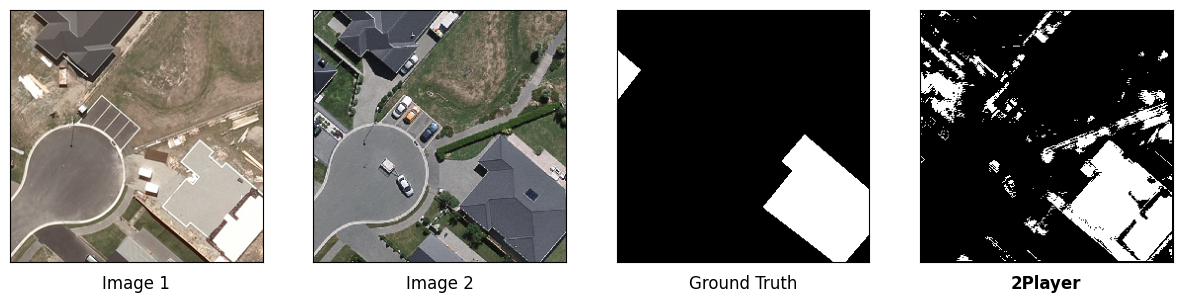

In [6]:
# Load images

with rasterio.open('./test_imgs/WHU1.tif') as src:
    im1 = src.read()
with rasterio.open('./test_imgs/WHU2.tif') as src:
    im2 = src.read()
with rasterio.open('./test_imgs/WHULab.tif') as src:
    lab = src.read(1)

im1 = torch.tensor(im1, dtype=torch.float32)/ 255 # Normalize uint16
im2 = torch.tensor(im2, dtype=torch.float32)/ 255
lab = torch.tensor(lab, dtype=torch.float32)

# Load pretrained model
pretrained_2players =  './checkpoints/2player/2Player_WHUCD.ckpt'
pretrained_AE = './checkpoints/player2/player2_pretrained_WHUCD.ckpt'
model_HRSCD =PlayersGame_W_Probability.load_from_checkpoint(pretrained_2players, lr=1e-4, P1='SiamUnet', lamb = 2e-2, lamb_totvar=0, lamb_prob=1e-4, alpha=10, beta=1e-2, pretrained_AE=pretrained_AE, freeze=False).eval()

pred_w_prob = model_HRSCD(im1.unsqueeze(0),im2.unsqueeze(0))

import matplotlib.pyplot as plt
import matplotlib

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15,4))

ax1.imshow(im1.permute(1, 2, 0))
ax2.imshow(im2.permute(1, 2, 0))
ax3.imshow(lab.squeeze(), cmap='gist_gray', vmin=0, vmax=1)
ax4.imshow((pred_w_prob>0.5).to(device='cpu').detach().squeeze(), cmap='gist_gray', vmin=0, vmax=1)

ax1.text(0.5, -0.05, 'Image 1', ha='center', va='top', transform=ax1.transAxes, fontsize=12)
ax2.text(0.5, -0.05, 'Image 2', ha='center', va='top', transform=ax2.transAxes, fontsize=12)
ax3.text(0.5, -0.05, 'Ground Truth', ha='center', va='top', transform=ax3.transAxes, fontsize=12)
ax4.text(0.5, -0.05, '2Player', ha='center', va='top', transform=ax4.transAxes, fontsize=12,fontweight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])